# **Python Programming for the Oyate**
## A Guide to Coding Normalized Difference Vegetation (NDVI) for *Oyate tawa* (Our Communities)

Generated by Wakinyan Zi, Elisha (Yellow Thunder)

Research Faculty, TEK/IRM

Intertribal Research Resource Center/United Tribes Technical College




**Good for the People (translate to lakota)**

How does this apply to us as Oceti Sakowin?

Why is NDVI important for us to learn and use in our oyanke?



### **Normalized Difference Vegetation Index (NDVI)**
#### One example of GIS and geospatial analysis is Normalized Difference Vegetation Index (NDVI), which uses the light that plants reflect and absorb to assess vegetation. Satellite imagery, light wavelengths, and mathematical calculations are used to measure the “optical reflectance of sunlight in the red and near-infrared wavelengths” (Eastman, et al., 2013). NDVI can be useful to analyze agricultural lands for crop health and production, depict land cover change over time, and assess riparian zones, amongst many other applications.

NDVI is a geospatial mathematical calculation that measures the difference in the light that vegetation reflects and the light that vegetation absorbs.

This type of geospatial analysis is useful for understanding leaf area index (LAI), tree classification, vegetation health, and estimating biomass, amongst many other applications. Many of hese applications of NDVI can help tribes with the mitigation of extreme weather events caused by climate change.

Utilizing python programming language allows for replication of the NDVI analysis. The code can be handed to other Oyanke (reservations) and they can use it to visualize their lands.

This is a step by step process adapted for tribal college students, community members, tribal programs, and elders.

We will use google colab notebooks to code. Google colab comes with libraries built in so we dont end up down the library/environment rabbit hole. Also, google colabs are fairly easier to share across internet and computing platforms.

#### *Elders have been asking for this geospatial analysis for a long time. Leksi Reno Red Cloud, Director of Oglala Sioux Tribe Water Resources, has been asking for an NDVI analysis of the riparian zones in grazing units on the Reservation, as they are indicators of water quality. Thunwin Faith Spotted Eagle, Braveheart Kunsi Circle and creator of the Mni Wizipan Wakan Project, has been requesting NDVI to determine the change over time for Mni Sose since the dams were built. With visualizations like this they can finally have data to support their cases.*



---



**print('Han, Mitakuyapi!')** is the programmers test to determine if the python notebook or coding space you are in is working properly.
It is strongly encouraged that we each use our traditional languages. It creates a space for healing in our programming *tiwahe na tiospaye* (family and extended family).

---



In [ ]:
# this is the universal way of testing the notebook or workspace you are programming (coding) in.
message = ('Han, Mitakuyapi!')

print(message)
print

Han, Mitakuyapi!


<function print>

# **Ehank Ehan (In the Beginning)**

*   Import the libraries **ee** (google earth engines) and **geemap** (mapping library)
*  Test the code by generating a map of the world
*   Set the center of the map using the ee python function Map.setCenter()
*   Set the point location of the map so that it centers each time.





**Import Google Earth Engine into google colab notebooks**

In [ ]:
# import the google earth engine into google colab notebooks

import ee

**Import geemap - the interactive mapping library for google earth engine**

In [ ]:
# import geemap the interactive mapping library

import geemap

**Generate a map to test the code**

# **Authenticating Google Earth Engine and Creating a Cloud Project**
#### If you are new to Google Earth Engine the following code box will trigger an authentication workflow (process). Follow the steps and then copy and paste the authentication code into the bar. If the token generator doesn't show up you can use the authentication-initialize code to create a 'Cloud Project'.

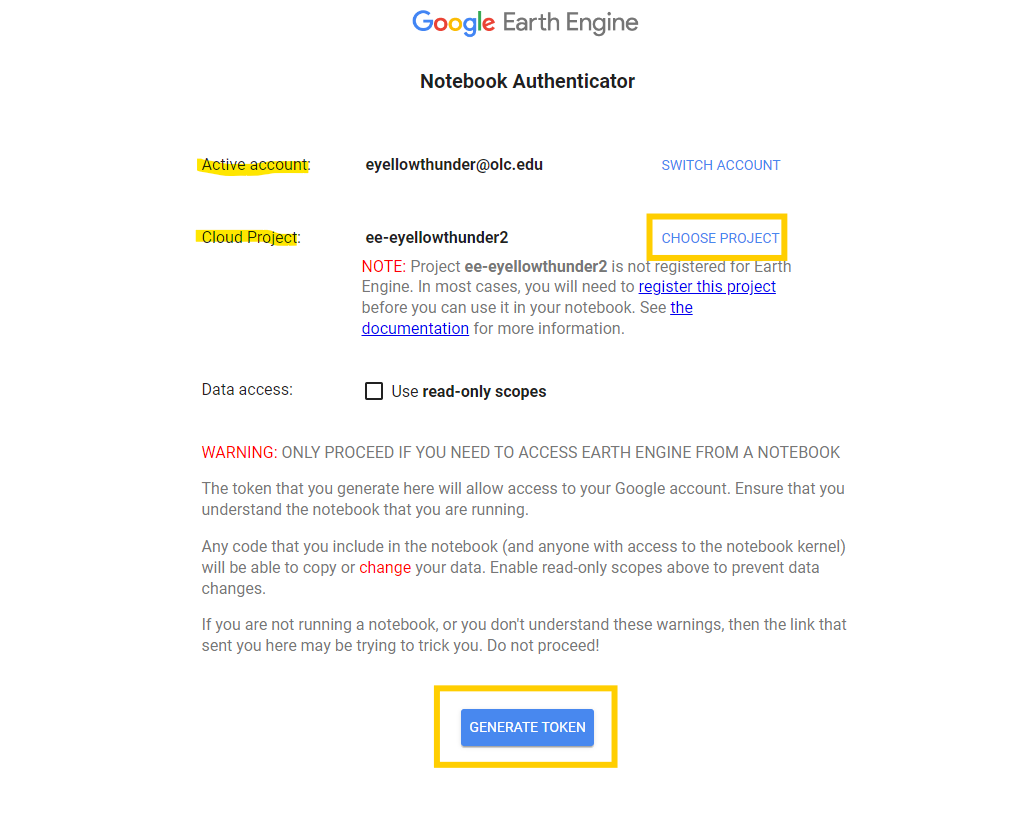

#### **Activate Account = 'your email'**

#### **Cloud Project = 'project_name'**

#### Click the 'Generate Token' button, allow permissions, and then copy the authentication code

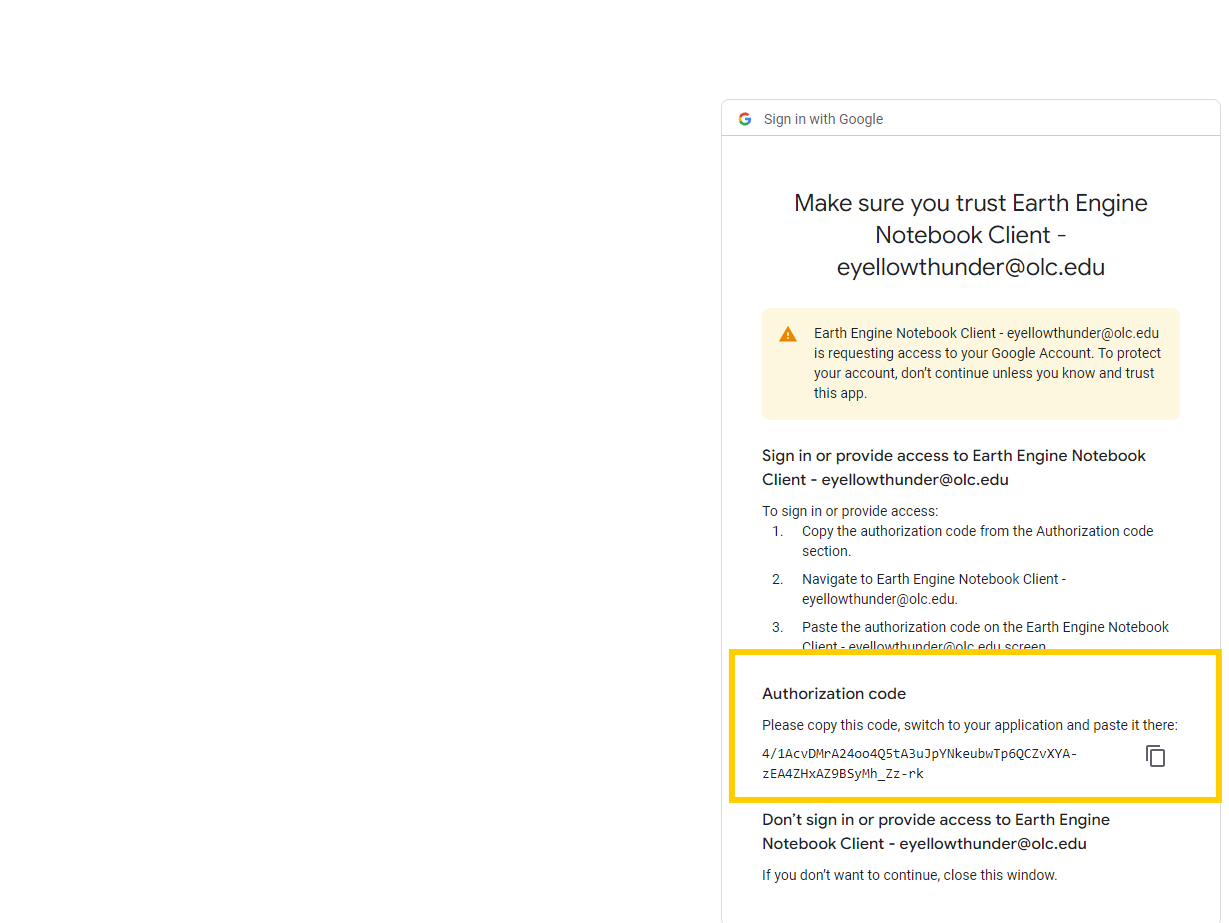

In [ ]:
    # This code will create a token and project

    ee.Authenticate()
    ee.Initialize(project='ee-eyellowthunder2')

In [ ]:
# Generate the map that will be used for the NDVI Area of Interest
# This is where the steps for authentication will come in

Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

**We will set the center of the map to the desired latitude and longitude values**

We can get the latitude and longitude from Google Earth.


*   Open Google Earth
*   Add a Placemark
*   Lat/Long will be in the "Placemark Placement" part of the description

We can also do a google search of the nearest town/city or other known locations, (i.e. our community churches or schools).




In [ ]:
# underneath the hood - Map.setCenter() represents a function in python language. You are telling the program to move the map to center on a specified point

Map.setCenter(-102.0908239, 43.1241248, 9);  # the 9 in the parenthesis represents the zoom on the map

# the map above centers to the lat/long

**Set the location point of the map so that it centers according to geometry**


In [ ]:
# setting the location point geometry

point = ee.Geometry.Point(-102.0908239, 43.1241248);

# **Getting the Sentinel data from GEE and bringing it into Google Colab (juptyer notebook)**

####  Go to the GEE datasets (earth engine data catalog)
[Harmonized Sentinel-2 MSI](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_HARMONIZED)

Copy and paste the 'Earth Engine Snippet' into the working jupyter notebook


In [ ]:
# generating the code that will get the sentinel data and bring into the notebook

data = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterBounds(point); # this is the point location we createed in the code above

#### **Now we will create an image function and enter the data set so that we can read and do math on it.**

We will filter according to date and then sort for cloud coverage assessment (CCA). CCA is found in the image properties tage in the GEE catalog for Sentinal

In [ ]:
# create the image function - enter dataset (image)

image = ee.Image(data.filterDate("2019-01-01", "2019-12-31").sort("CLOUD_COVERAGE_ASSESSMENT").first());

# **Create a variable for NDVI**

The formula for the equation for NDVI is

**(Near Infrared - RED) / (Near Infrared + RED)**

**NIR = B8**

**RED = B4**

**(B8 - B4)/(B8 + B4)**

These are wavelengths, bands, in the Sentinel image we downloaded from GEE. To find the band number go to the 'Bands' tab on the image link



[Harmonized Sentinel-2 MSI](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_HARMONIZED)

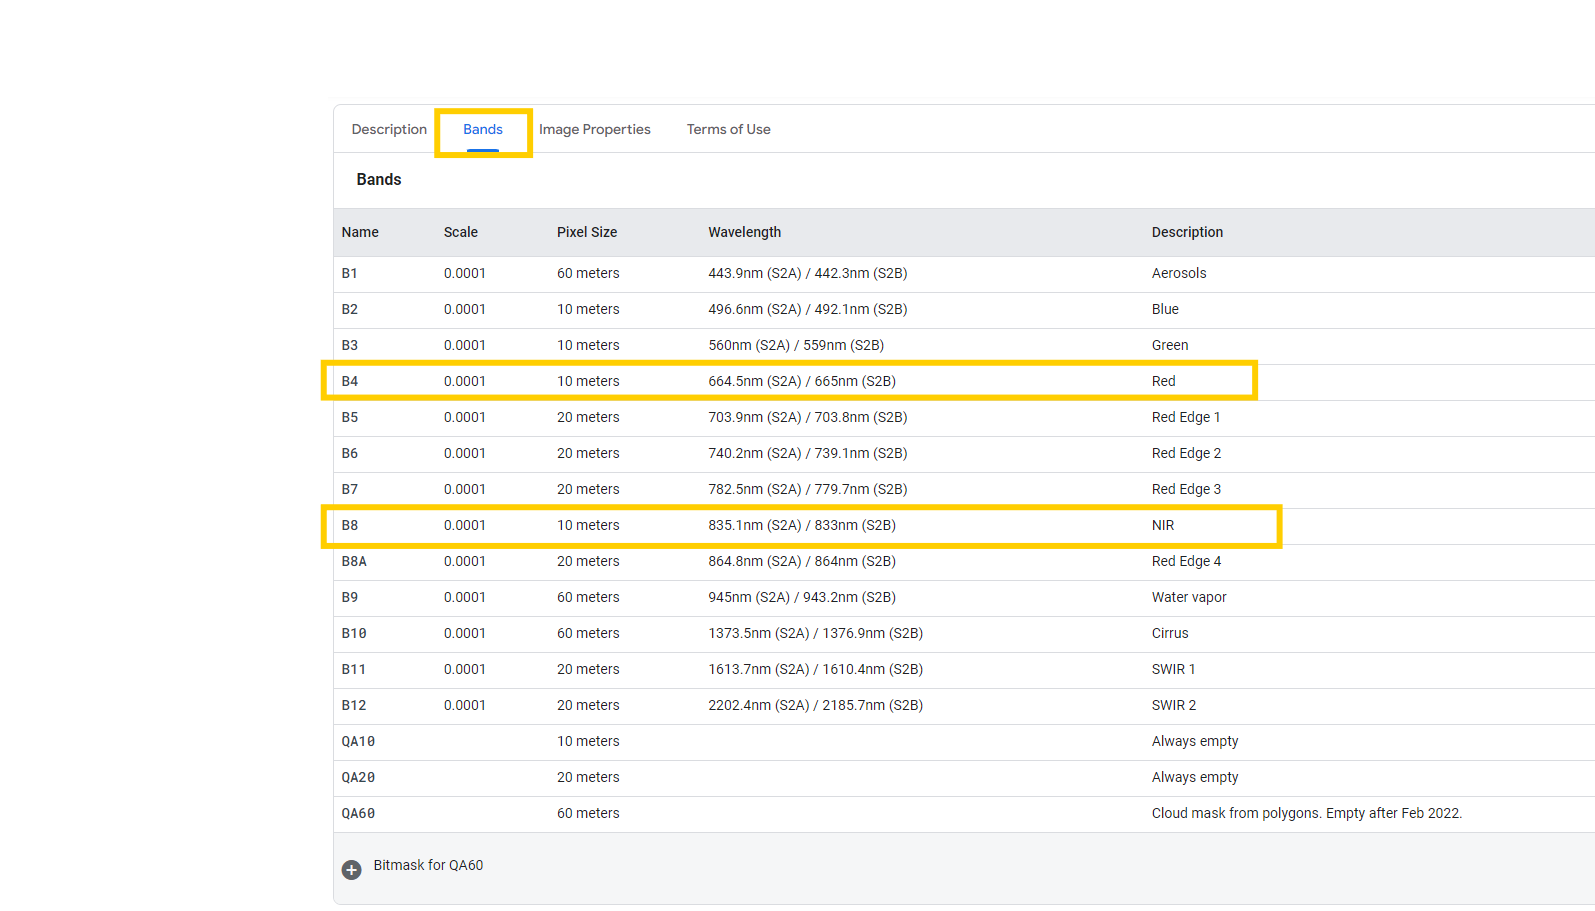


In [ ]:
# code for the NDVI calculation

ndvi = image.expression(
    "(NIR - RED) / (NIR + RED)",
    {"NIR":image.select("B8"),
     "RED":image.select("B4")})




In [ ]:
# we will display the NDVi image

display = {
    "min":0,
    "max":1,
    "palette": ['blue', 'yellow', 'green', 'darkgreen', 'black']
}


In [ ]:
Map.addLayer(ndvi, display);
# set center of map
Map.setCenter(-102.0908239, 43.1241248, 9);
Map

EEException: Caller does not have required permission to use project ee-eyellowthunder2. Grant the caller the roles/serviceusage.serviceUsageConsumer role, or a custom role with the serviceusage.services.use permission, by visiting https://console.developers.google.com/iam-admin/iam/project?project=ee-eyellowthunder2 and then retry. Propagation of the new permission may take a few minutes.